In [0]:
import tensorflow as tf
print(tf.__version__)

C:\Users\Hai\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.10.0


The Fashion MNIST data is available directly in the tf.keras datasets API:

In [0]:
mnist = tf.keras.datasets.fashion_mnist

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.

In [0]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [0]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

All the values of numbers are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'

In [0]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Define Model

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do.

**Relu** effectively means "If X>0 return X, else return 0" -- it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0]

Build/Compile Model

In [0]:
model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 12s 194us/step - loss: 0.5002 - acc: 0.8246
Epoch 2/5
60000/60000 [==============================] - 8s 133us/step - loss: 0.3768 - acc: 0.8637
Epoch 3/5
60000/60000 [==============================] - 11s 182us/step - loss: 0.3381 - acc: 0.8762
Epoch 4/5
60000/60000 [==============================] - 10s 159us/step - loss: 0.3165 - acc: 0.8832
Epoch 5/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.2979 - acc: 0.8889


Evaluate Model

In [0]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 121us/step


[0.3565299671888351, 0.8711]

The model is 87.11% accurate on test data

Exploration

In [0]:
classifications = model.predict(test_images)

print(classifications[0])

[7.3224513e-08 2.1255195e-08 1.6272395e-07 2.9288103e-07 4.5270767e-07
 2.2786092e-02 3.7761365e-06 2.6003588e-02 1.2060289e-05 9.5119351e-01]


In [0]:
print(test_labels[0])

9


The first image is classified as 9 (it has the highest probability in predictions)

Impact of changing the dense layer neurons

In [0]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

1.10.0
11493376/11490434 [==============================] - 10s 1us/step
Epoch 1/5
60000/60000 [==============================] - 40s 670us/step - loss: 0.1832
Epoch 2/5
60000/60000 [==============================] - 36s 592us/step - loss: 0.0732
Epoch 3/5
60000/60000 [==============================] - 36s 592us/step - loss: 0.0487
Epoch 4/5
60000/60000 [==============================] - 36s 599us/step - loss: 0.0345
Epoch 5/5
10000/10000 [==============================] - 1s 131us/step
[1.6722790e-10 2.9785667e-11 4.0057038e-09 1.4995891e-06 3.0686703e-15
 4.0820920e-09 8.2015077e-16 9.9999797e-01 1.8009041e-08 4.2743952e-07]
7


Training takes longer, but is more accurate

The effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10.

Ans: There isn't a significant impact -- because this is relatively simple data. For far more complex data, extra layers are often necessary.

Consider the impact of training for more or less epochs. Why do you think that would be the case?

With 15 epochs -- we get a model with a much better loss than the one with 5 Try 30 epochs -- we see the loss value stops decreasing, and sometimes increases. This is a side effect of something called 'overfitting'.

In [0]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=15)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

1.10.0
Epoch 1/15
60000/60000 [==============================] - 28s 463us/step - loss: 0.1886
Epoch 2/15
60000/60000 [==============================] - 25s 408us/step - loss: 0.0802
Epoch 3/15
60000/60000 [==============================] - 25s 414us/step - loss: 0.0563
Epoch 4/15
60000/60000 [==============================] - 25s 412us/step - loss: 0.0422
Epoch 5/15
60000/60000 [==============================] - 25s 412us/step - loss: 0.0313
Epoch 6/15
60000/60000 [==============================] - 25s 413us/step - loss: 0.0286
Epoch 7/15
60000/60000 [==============================] - 25s 422us/step - loss: 0.0241
Epoch 8/15
60000/60000 [==============================] - 25s 418us/step - loss: 0.0215
Epoch 9/15
60000/60000 [==============================] - 26s 434us/step - loss: 0.0165
Epoch 10/15
60000/60000 [==============================] - 25s 421us/step - loss: 0.0189
Epoch 11/15
60000/60000 [==============================] - 25s 421us/step - loss: 0.0140
Epoch 12/15
60000/60000

In [0]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

C:\Users\Hai\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.10.0
Epoch 1/30
60000/60000 [==============================] - 28s 460us/step - loss: 0.1874
Epoch 2/30
60000/60000 [==============================] - 25s 411us/step - loss: 0.0790
Epoch 3/30
60000/60000 [==============================] - 25s 422us/step - loss: 0.0562
Epoch 4/30
60000/60000 [==============================] - 26s 427us/step - loss: 0.0412
Epoch 5/30
60000/60000 [==============================] - 26s 428us/step - loss: 0.0334
Epoch 6/30
60000/60000 [==============================] - 24s 398us/step - loss: 0.0266
Epoch 7/30
60000/60000 [==============================] - 24s 405us/step - loss: 0.0239
Epoch 8/30
60000/60000 [==============================] - 23s 391us/step - loss: 0.0227
Epoch 9/30
60000/60000 [==============================] - 25s 414us/step - loss: 0.0179
Epoch 10/30
60000/60000 [==============================] - 25s 418us/step - loss: 0.0187
Epoch 11/30
60000/60000 [==============================] - 24s 397us/step - loss: 0.0156
Epoch 12/30
60000/60000


Impact of not normalizing data

In [0]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images
test_images=test_images
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

1.10.0
Epoch 1/5
60000/60000 [==============================] - 25s 412us/step - loss: 11.4037
Epoch 2/5
60000/60000 [==============================] - 21s 349us/step - loss: 11.2471
Epoch 3/5
60000/60000 [==============================] - 21s 346us/step - loss: 10.6653
Epoch 4/5
60000/60000 [==============================] - 21s 348us/step - loss: 10.1149
Epoch 5/5
10000/10000 [==============================] - 1s 72us/step
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7


Using Call backs

In [0]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])


1.10.0
Epoch 1/5
60000/60000 [==============================] - 22s 364us/step - loss: 0.4770
Epoch 2/5
60000/60000 [==============================] - 22s 367us/step - loss: 0.3604

Reached 60% accuracy so cancelling training!


Improving Computer Vision Accuracy using Convolutions



In [0]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images / 255.0
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)

Epoch 1/5
60000/60000 [==============================] - 11s 180us/step - loss: 0.4992 - acc: 0.8237
Epoch 2/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.3703 - acc: 0.8671
Epoch 3/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.3301 - acc: 0.8796
Epoch 4/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.3070 - acc: 0.8872
Epoch 5/5
10000/10000 [==============================] - 1s 106us/step


accuracy is probably about 89% on training and 87% on validation
Use convolutions to improve it.Convoulution narrow down the content of the image to focus on specific, distinct, details.

In short, you take an array (usually 3x3 or 5x5) and pass it over the image.
By changing the underlying pixels based on the formula within that matrix, you can do things like edge detection. 

This is perfect for computer vision, because often it's features that can get highlighted like this that distinguish one item for another, and the amount of information needed is then much less...because you'll just train on the highlighted features.

Add some layers to do convolution before you have the dense layers, and then the information going to the dense layers is more focussed, and possibly more accurate.



In [0]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)

1.13.1
4423680/4422102 [==============================] - 0s 0us/step
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    


The validation accuracy increase and then decreases.This is overfitting on the training data

Visualizing the Convolutions and Pooling
This code will show us the convolutions graphically. The print (test_labels[;100]) shows us the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (9). They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the DNN is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

In [0]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


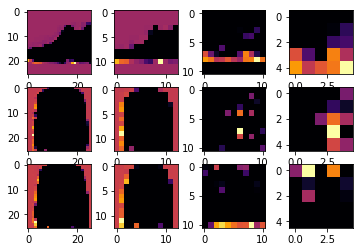

In [0]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

1.Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

In [0]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

1.13.1
11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.1556 - acc: 0.9542
Epoch 2/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0549 - acc: 0.9832
Epoch 3/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0366 - acc: 0.9885
Epoch 4/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0241 - acc: 0.9923
Epoch 5/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.0170 - acc: 0.9943
Epoch 6/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0132 - acc: 0.9958
Epoch 7/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0093 - acc: 0.9970
Epoch 8/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0075 - acc: 0.9976
Epoch 9/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0056 - acc: 0.9982
E

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               346240    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 347,690
Trainable params: 347,690
Non-trainable params: 0
_________________________________________________________________


In [0]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

1.13.1
Epoch 1/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.1362 - acc: 0.9585
Epoch 2/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0461 - acc: 0.9863
Epoch 3/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0299 - acc: 0.9906
Epoch 4/10
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0176 - acc: 0.9943
Epoch 5/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0115 - acc: 0.9962
Epoch 6/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0097 - acc: 0.9969
Epoch 7/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0068 - acc: 0.9976
Epoch 8/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0059 - acc: 0.9980
Epoch 9/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0046 - acc: 0.9984
Epoch 10/10
10000/10000 [==============================] - 1s 68us

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1384576   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________


2. Add a new convolution layer.

In [0]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

1.13.1
Epoch 1/10
60000/60000 [==============================] - 8s 139us/sample - loss: 0.1341 - acc: 0.9596
Epoch 2/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0457 - acc: 0.9862
Epoch 3/10
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0327 - acc: 0.9896
Epoch 4/10
60000/60000 [==============================] - 9s 146us/sample - loss: 0.0241 - acc: 0.9925
Epoch 5/10
60000/60000 [==============================] - 9s 143us/sample - loss: 0.0170 - acc: 0.9950
Epoch 6/10
60000/60000 [==============================] - 8s 138us/sample - loss: 0.0147 - acc: 0.9954
Epoch 7/10
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0118 - acc: 0.9964
Epoch 8/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.0096 - acc: 0.9970
Epoch 9/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.0089 - acc: 0.9974
Epoch 10/10
10000/10000 [==============================] - 1s 64us

Call backs 

In [0]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

Epoch 1/10
60000/60000 [==============================] - 8s 140us/sample - loss: 0.1334 - acc: 0.9592
Epoch 2/10
60000/60000 [==============================] - 8s 139us/sample - loss: 0.0435 - acc: 0.9864
Epoch 3/10
59680/60000 [============================>.] - ETA: 0s - loss: 0.0314 - acc: 0.9902
Reached 99% accuracy so cancelling training!
10000/10000 [==============================] - 1s 66us/sample - loss: 0.0273 - acc: 0.9905
0.9905
